#### 1. Data Exploration and Data Preprocessing:

In [1]:
import pandas as pd
df_train = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df_train = df_train.drop("Cabin",axis=1)
df_test = df_test.drop("Cabin",axis=1)

##### Handling Missing values

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import numpy as np
mean_Age = np.round(df_train["Age"].mean(),0)
mean_Age

30.0

In [11]:
df_train["Age"] = df_train["Age"].fillna(mean_Age)

In [12]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [13]:
df_train = df_train.drop(61)
df_train = df_train.drop(829)

In [14]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df_train[df_train.duplicated()].shape

(0, 11)

In [16]:
num_cols = df_train.select_dtypes(include=['number']).columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [17]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.713352,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.969135,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030111,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.075512,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.326343,0.081656,0.016824,-0.548193
Age,0.030111,-0.075512,-0.326343,1.000000,-0.231691,-0.179377,0.087674
SibSp,-0.057686,-0.034040,0.081656,-0.231691,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.179377,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.087674,0.160887,0.217532,1.000000


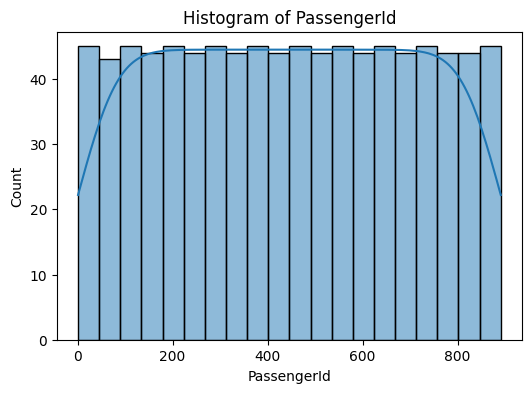

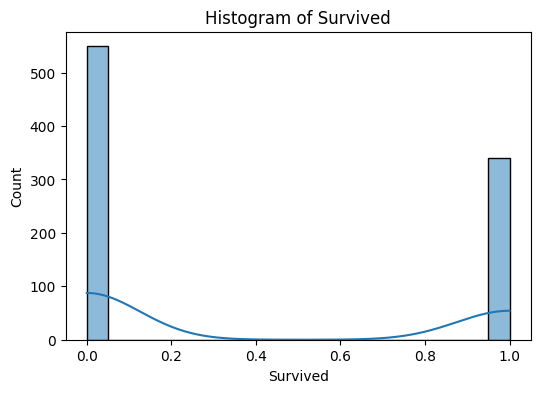

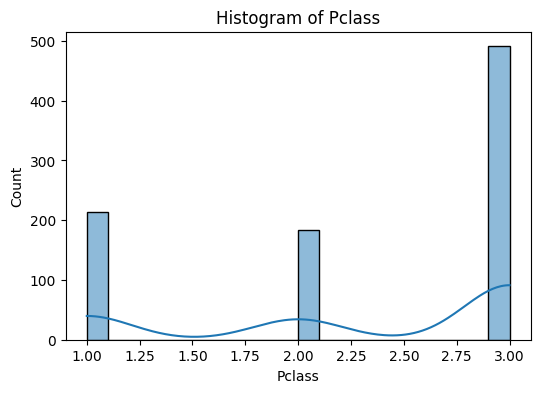

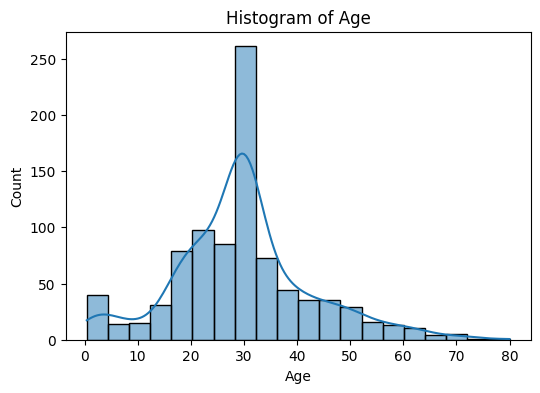

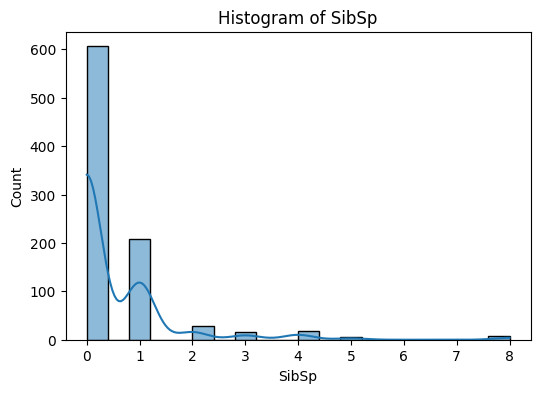

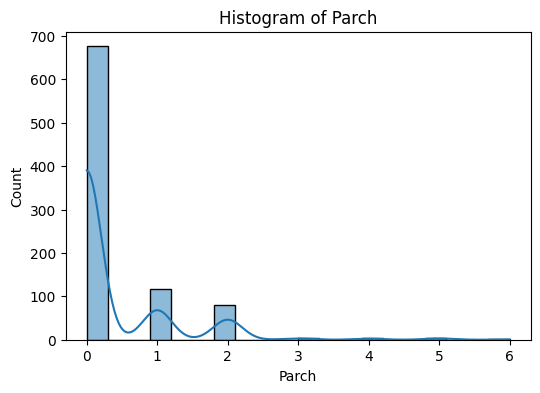

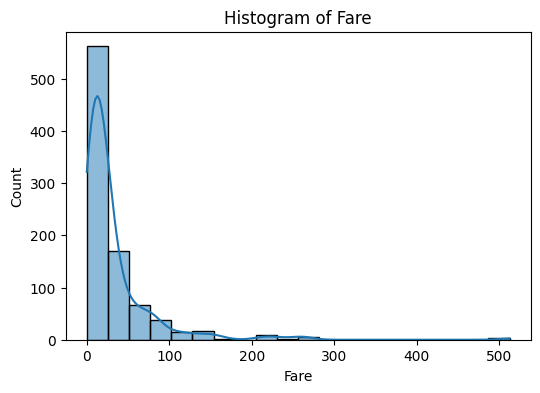

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df_train.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_train[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

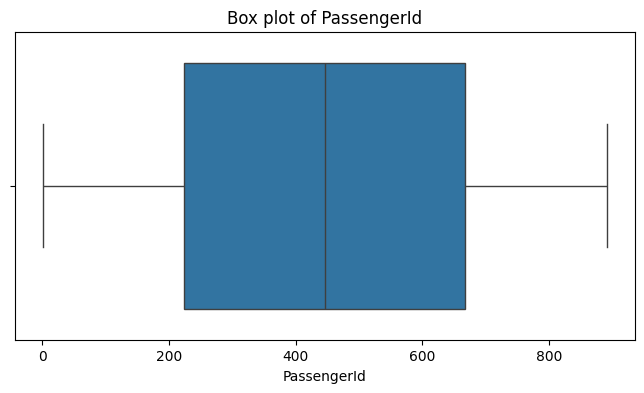

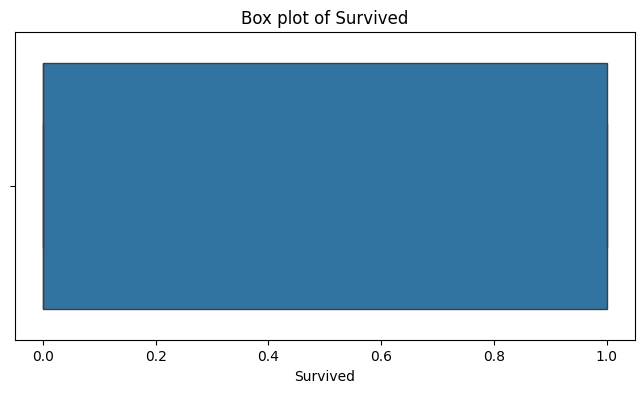

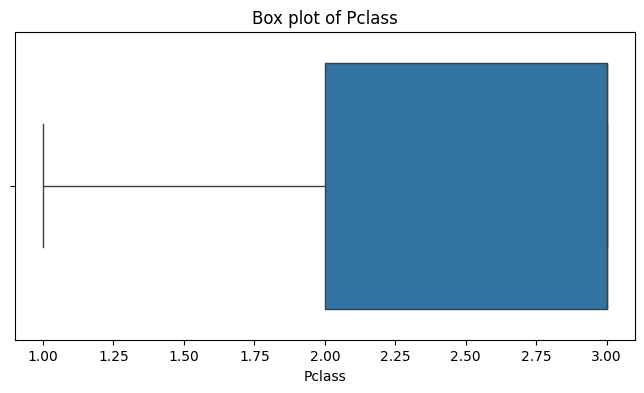

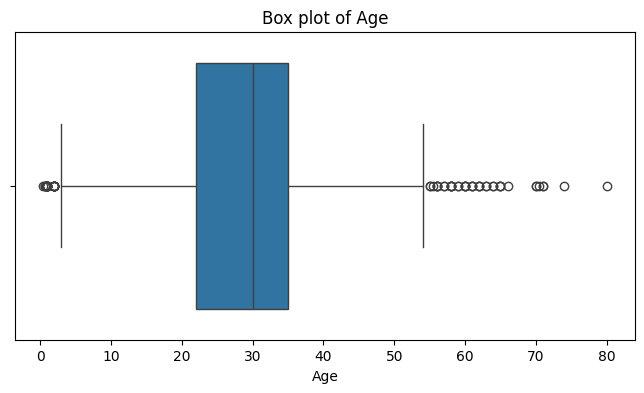

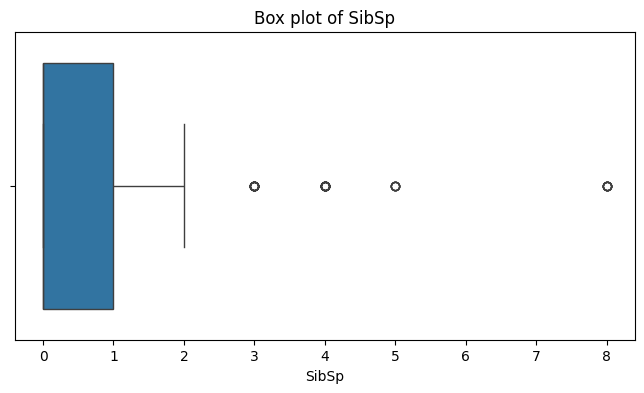

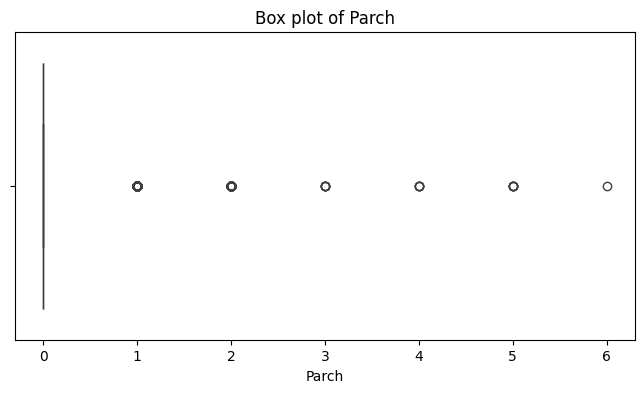

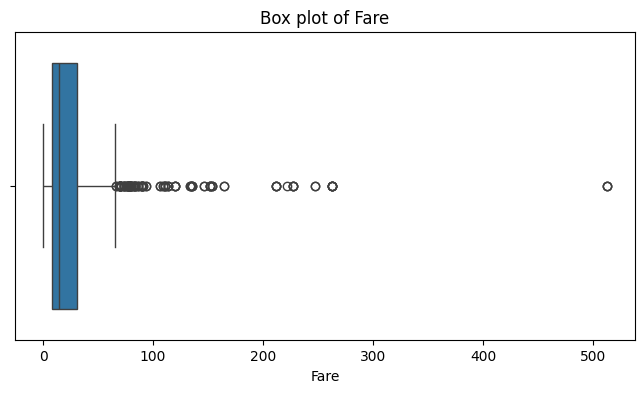

In [20]:
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [21]:
#Removing outliers

In [22]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df_train["Age"],25)
Q3 = np.percentile(df_train["Age"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [23]:
print("Number of outliers present in Age Column : ",len(df_train["Age"][df_train["Age"]>UW]))
print("Number of outliers present in Age Column : ",len(df_train["Age"][df_train["Age"]<LW]))

Number of outliers present in Age Column :  41
Number of outliers present in Age Column :  24


In [24]:
#Replacing the outlier values with nearest whisker length
df_train["Age"][df_train["Age"]>UW] = UW
df_train["Age"][df_train["Age"]<LW] = LW

In [25]:
print("Number of outliers present in Age Column : ",len(df_train["Age"][df_train["Age"]>UW]))
print("Number of outliers present in Age Column : ",len(df_train["Age"][df_train["Age"]<LW]))

Number of outliers present in Age Column :  0
Number of outliers present in Age Column :  0


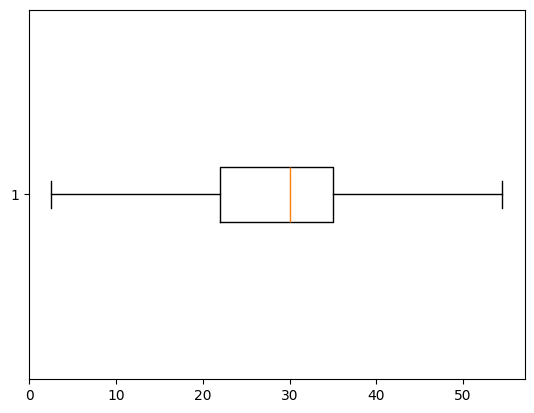

In [26]:
plt.boxplot(df_train["Age"],vert=False)
plt.show()

In [27]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df_train["Parch"],25)
Q3 = np.percentile(df_train["Parch"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [28]:
print("Number of outliers present in Parch Column : ",len(df_train["Parch"][df_train["Parch"]>UW]))
print("Number of outliers present in Parch Column : ",len(df_train["Parch"][df_train["Parch"]<LW]))

Number of outliers present in Parch Column :  213
Number of outliers present in Parch Column :  0


In [29]:
df_train["Parch"][df_train["Parch"]>UW] = UW

In [30]:
print("Number of outliers present in Parch Column : ",len(df_train["Parch"][df_train["Parch"]>UW]))
print("Number of outliers present in Parch Column : ",len(df_train["Parch"][df_train["Parch"]<LW]))

Number of outliers present in Parch Column :  0
Number of outliers present in Parch Column :  0


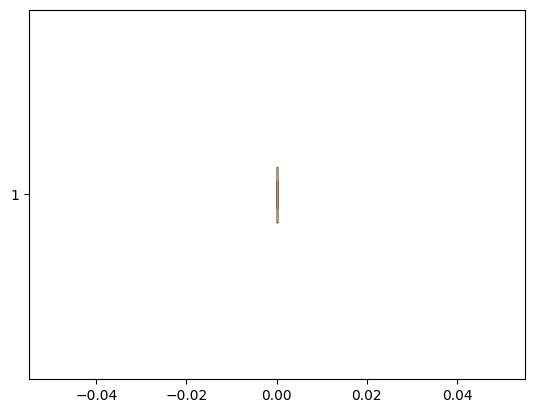

In [31]:
plt.boxplot(df_train["Parch"],vert=False)
plt.show()

In [32]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df_train["SibSp"],25)
Q3 = np.percentile(df_train["SibSp"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [33]:
print("Number of outliers present in SibSp Column : ",len(df_train["SibSp"][df_train["SibSp"]>UW]))
print("Number of outliers present in SibSp Column : ",len(df_train["SibSp"][df_train["SibSp"]<LW]))

Number of outliers present in SibSp Column :  46
Number of outliers present in SibSp Column :  0


In [34]:
df_train["SibSp"][df_train["SibSp"]>UW] = UW
df_train["SibSp"][df_train["SibSp"]<LW] = LW

In [35]:
print("Number of outliers present in SibSp Column : ",len(df_train["SibSp"][df_train["SibSp"]>UW]))
print("Number of outliers present in SibSp Column : ",len(df_train["SibSp"][df_train["SibSp"]<LW]))

Number of outliers present in SibSp Column :  0
Number of outliers present in SibSp Column :  0


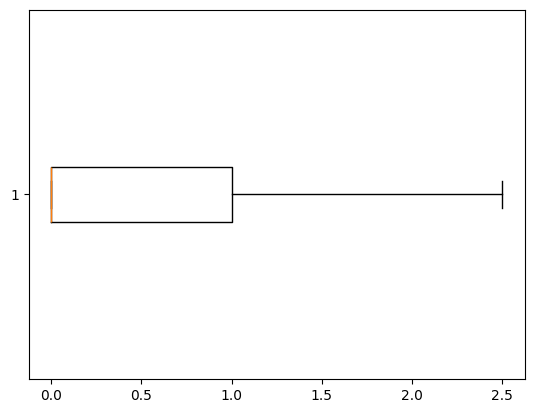

In [36]:
plt.boxplot(df_train["SibSp"],vert=False)
plt.show()

In [37]:
Q1 = np.percentile(df_train["Fare"],25)
Q3 = np.percentile(df_train["Fare"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [38]:
print("Number of outliers present in Fare Column : ",len(df_train["Fare"][df_train["Fare"]>UW]))
print("Number of outliers present in Fare Column : ",len(df_train["Fare"][df_train["Fare"]<LW]))

Number of outliers present in Fare Column :  114
Number of outliers present in Fare Column :  0


In [39]:
df_train["Fare"][df_train["Fare"]>UW] = UW

In [40]:
print("Number of outliers present in Fare Column : ",len(df_train["Fare"][df_train["Fare"]>UW]))
print("Number of outliers present in Fare Column : ",len(df_train["Fare"][df_train["Fare"]<LW]))

Number of outliers present in Fare Column :  0
Number of outliers present in Fare Column :  0


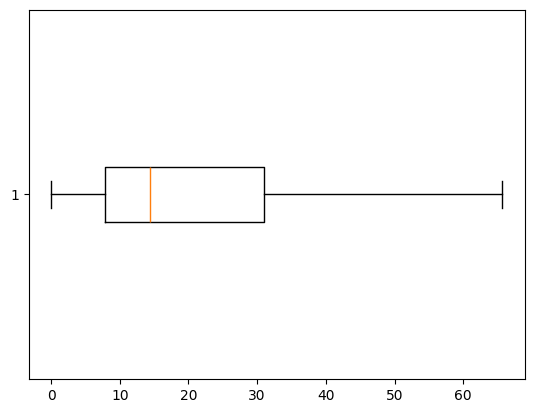

In [41]:
plt.boxplot(df_train["Fare"],vert=False)
plt.show()

In [42]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6563,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,S


#### Data transformation

In [43]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_train["Name"] = LE.fit_transform(df_train["Name"])
df_train["Sex"] = LE.fit_transform(df_train["Sex"])
df_train["Ticket"] = LE.fit_transform(df_train["Ticket"])
df_train["Fare"] = LE.fit_transform(df_train["Fare"])
df_train["Embarked"] = LE.fit_transform(df_train["Embarked"])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1.0,0,522,18,2
1,2,1,1,190,0,38.0,1.0,0,595,203,0
2,3,1,3,353,0,26.0,0.0,0,668,41,2
3,4,1,1,272,0,35.0,1.0,0,48,189,2
4,5,0,3,15,1,35.0,0.0,0,471,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.0,0.0,0,100,85,2
887,888,1,1,303,0,19.0,0.0,0,14,153,2
888,889,0,3,412,0,30.0,1.0,0,674,131,2
889,890,1,1,81,1,26.0,0.0,0,8,153,0


#### 3. Model Building:

In [44]:
df_train.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,-0.041324,0.043136,0.033206,-0.072990,NaN,-0.056852,-0.008233,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.059075,-0.541585,-0.071059,0.033225,NaN,-0.160931,0.323206,-0.169718
Pclass,-0.035330,-0.335549,1.000000,0.054837,0.127741,-0.326051,0.021124,NaN,0.315959,-0.708453,0.164681
Name,-0.041324,-0.059075,0.054837,1.000000,0.022087,0.059706,-0.066222,NaN,0.049406,-0.054351,-0.006849
Sex,0.043136,-0.541585,0.127741,0.022087,1.000000,0.083093,-0.170144,NaN,0.055024,-0.255409,0.110320
Age,0.033206,-0.071059,-0.326051,0.059706,0.083093,1.000000,-0.251066,NaN,-0.068515,0.098895,-0.030253
SibSp,-0.072990,0.033225,0.021124,-0.066222,-0.170144,-0.251066,1.000000,NaN,0.030326,0.428205,0.039187
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,-0.056852,-0.160931,0.315959,0.049406,0.055024,-0.068515,0.030326,NaN,1.000000,-0.174502,0.000271
Fare,-0.008233,0.323206,-0.708453,-0.054351,-0.255409,0.098895,0.428205,NaN,-0.174502,1.000000,-0.141580


In [45]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_test["Name"] = LE.fit_transform(df_test["Name"])
df_test["Sex"] = LE.fit_transform(df_test["Sex"])
df_test["Ticket"] = LE.fit_transform(df_test["Ticket"])
df_test["Fare"] = LE.fit_transform(df_test["Fare"])
df_test["Embarked"] = LE.fit_transform(df_test["Embarked"])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,34.5,0,0,152,24,1
1,893,3,403,0,47.0,1,0,221,5,2
2,894,2,269,1,62.0,0,0,73,41,1
3,895,3,408,1,27.0,0,0,147,34,2
4,896,3,178,0,22.0,1,1,138,46,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,NaN,0,0,267,31,2
414,1306,1,283,0,39.0,0,0,324,154,0
415,1307,3,332,1,38.5,0,0,346,9,2
416,1308,3,384,1,NaN,0,0,220,31,2


In [46]:
X = df_train.iloc[:,2:]
Y = df_train["Survived"]

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
mean_Age_test = np.round(df_test["Age"].mean(),0)
df_test["Age"] = df_test["Age"].fillna(mean_Age_test)

In [49]:
df_test["Age"] = df_test["Age"].fillna(mean_Age_test)

In [50]:
X_test = df_test.iloc[:,1:]

In [51]:
Y_pred_train = model.predict(X)
Pred_Prob = model.predict_proba(X)[:,1:]
Y_pred_test = model.predict(X_test)

In [52]:
df_test["Y_pred_test"] = model.predict(X_test)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Y_pred_test
0,892,3,206,1,34.5,0,0,152,24,1,0
1,893,3,403,0,47.0,1,0,221,5,2,0
2,894,2,269,1,62.0,0,0,73,41,1,0
3,895,3,408,1,27.0,0,0,147,34,2,0
4,896,3,178,0,22.0,1,1,138,46,2,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,30.0,0,0,267,31,2,0
414,1306,1,283,0,39.0,0,0,324,154,0,1
415,1307,3,332,1,38.5,0,0,346,9,2,0
416,1308,3,384,1,30.0,0,0,220,31,2,0


#### 4. Model Evaluation:

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_lgb = accuracy_score(Y,Y_pred_train)
precision_score = precision_score(Y,Y_pred_train)
recall_score = recall_score(Y,Y_pred_train)
f1_score = f1_score(Y,Y_pred_train)

In [54]:
print("accuracy score :",accuracy_score_lgb)
print("precision score :",precision_score)
print("recall score :",recall_score)
print("f1 score :",f1_score)

accuracy score : 0.7941507311586051
precision score : 0.7357357357357357
recall score : 0.7205882352941176
f1 score : 0.7280832095096582


In [55]:
from sklearn.metrics import roc_curve
TPR,FPR,dummy = roc_curve(Y,Y_pred_train)
TPR,FPR,dummy

(array([0.        , 0.16029144, 1.        ]),
 array([0.        , 0.72058824, 1.        ]),
 array([inf,  1.,  0.]))

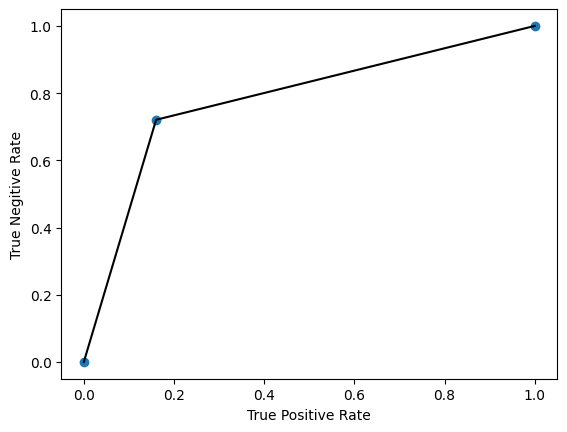

In [56]:
import matplotlib.pyplot as plt
plt.scatter(TPR,FPR)
plt.plot(TPR,FPR,color="black")
plt.xlabel("True Positive Rate")
plt.ylabel("True Negitive Rate")
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [58]:
roc_auc = roc_auc_score(Y, Pred_Prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.8500


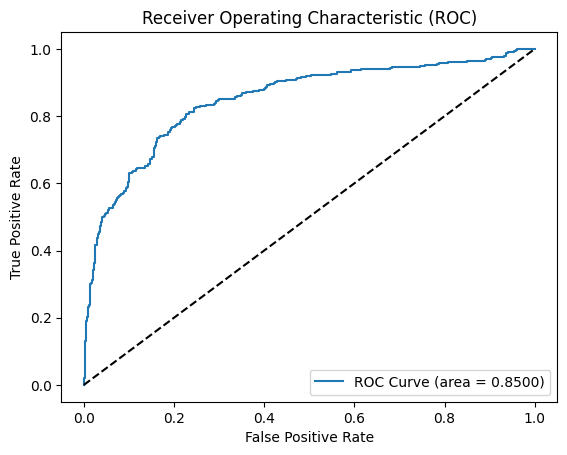

In [59]:
fpr, tpr, thresholds = roc_curve(Y, Pred_Prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

#### 5. Interpretation:

In [60]:
X = df_train.iloc[:,2:]
Y = df_train["Survived"]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [61]:
Y_pred = model.predict(X)

In [62]:
#Interpret the coefficients of the logistic regression model
model.coef_

array([[-1.25903332e-01, -2.52822835e-04, -2.41023703e+00,
        -4.02698855e-02, -9.56933425e-01,  0.00000000e+00,
        -1.33197154e-03,  1.38850441e-02, -4.87937891e-02]])

In [63]:
coefficients = model.coef_[0]
columns = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']

In [64]:
coef_df = pd.DataFrame({'Feature': columns,'Coefficient': coefficients})
coef_df

,Feature,Coefficient
0,Pclass,-0.125903
1,Name,-0.000253
2,Sex,-2.410237
3,Age,-0.040270
4,SibSp,-0.956933
5,Parch,0.000000
6,Ticket,-0.001332
7,Fare,0.013885
8,Embarked,-0.048794


In [65]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

# Interview Questions:
Q1)What is the difference between precision and recall?
A1)Precision refers to the number of True Positive values from total predicted values. (TP)/(TP+FP)

Q2)What is cross-validation, and why is it important in binary classification?
A)Cross-validation is a technique for validating our model not only once, but more number of times . It important in binary 
classification because it prevents overfitting, used for model selection and provides stable estimates for metrics like accuracy,
 precision, recall, F1-score, and ROC-AUC, which are central to evaluating binary classifiers.